# Bài 2.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.7/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="x1HbJdzPvj4nhwNZ1AOa")
project = rf.workspace("alpaco5-f3woi").project("part-autolabeld")
dataset = project.version(5).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to part-autolabeld-5 in yolov8:: 100%|██████████| 18890/18890 [00:05<00:00, 3341.01it/s]


## 2.1. Training

In [ ]:
%cd {HOME}
!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=3 imgsz=640

/content
100% 22.8M/22.8M [00:00<00:00, 424MB/s]
New https://pypi.org/project/ultralytics/8.2.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/part-autolabeld-5/data.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, s

In [ ]:
!ls {HOME}/runs/segment/train/

args.yaml					    labels.jpg	      train_batch2.jpg
BoxF1_curve.png					    MaskF1_curve.png  val_batch0_labels.jpg
BoxP_curve.png					    MaskP_curve.png   val_batch0_pred.jpg
BoxPR_curve.png					    MaskPR_curve.png  val_batch1_labels.jpg
BoxR_curve.png					    MaskR_curve.png   val_batch1_pred.jpg
confusion_matrix_normalized.png			    results.csv       val_batch2_labels.jpg
confusion_matrix.png				    results.png       val_batch2_pred.jpg
events.out.tfevents.1722436993.6a91afa4aa33.1487.0  train_batch0.jpg  weights
labels_correlogram.jpg				    train_batch1.jpg


/content


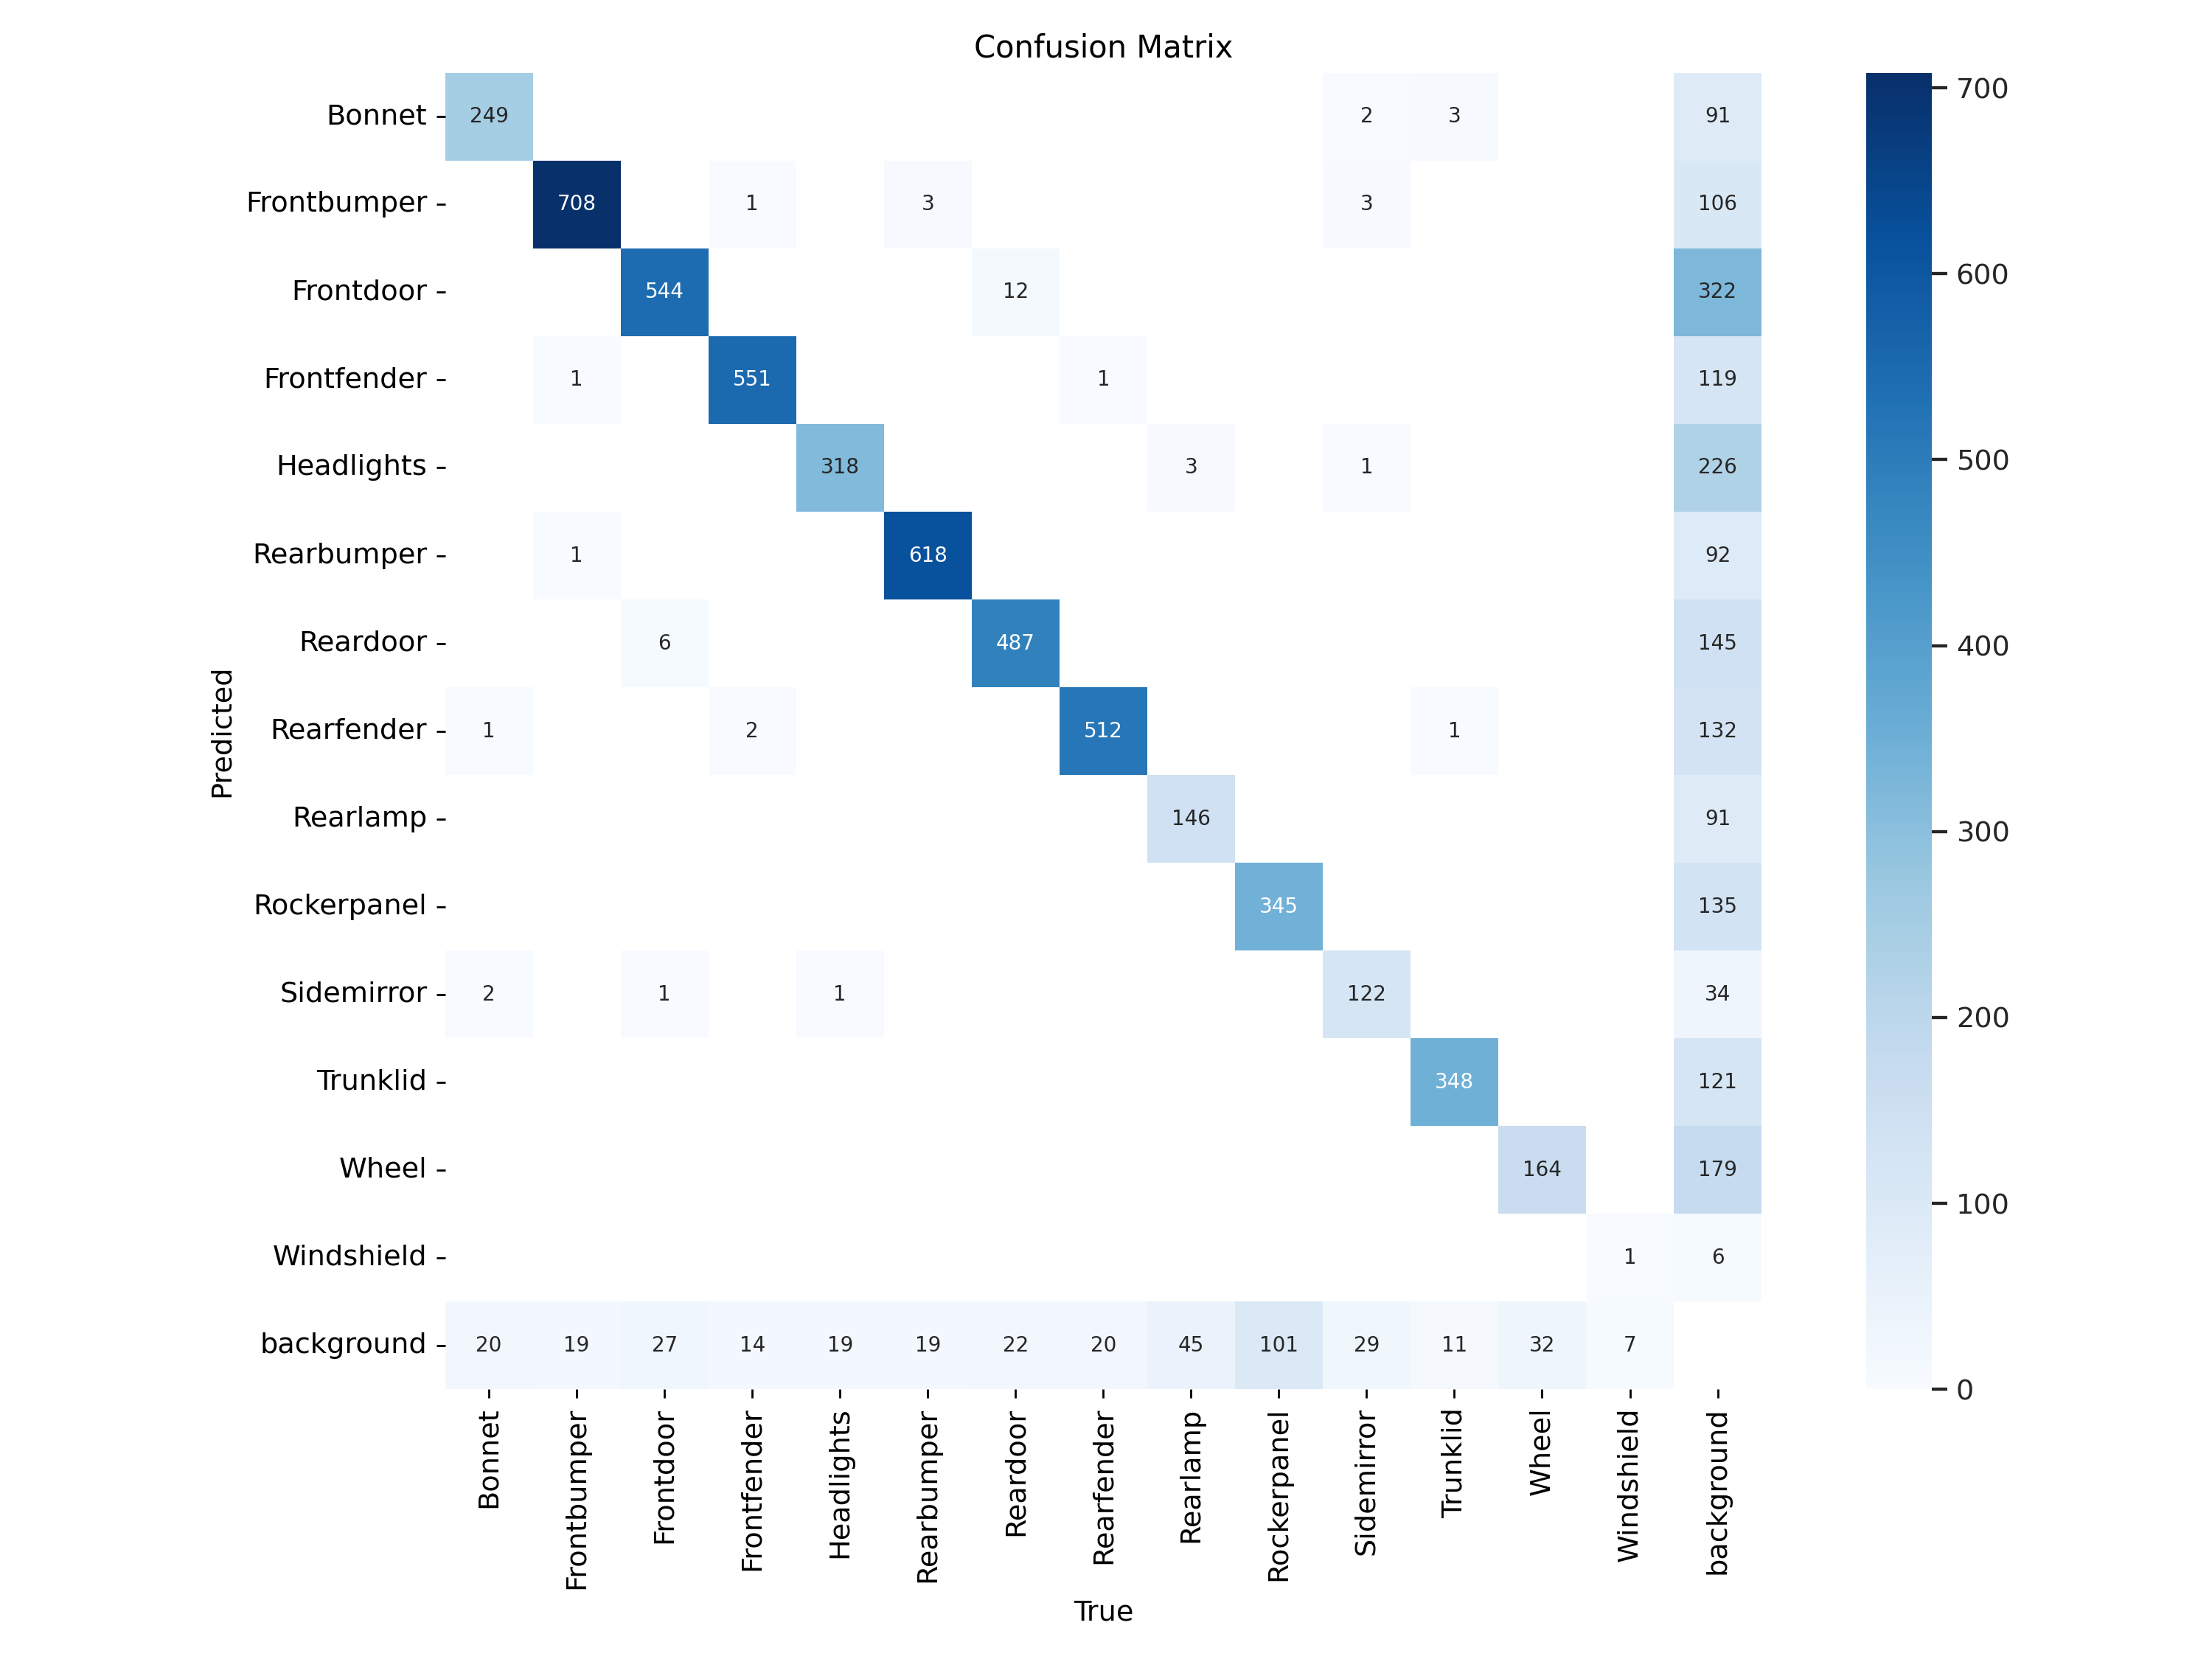

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


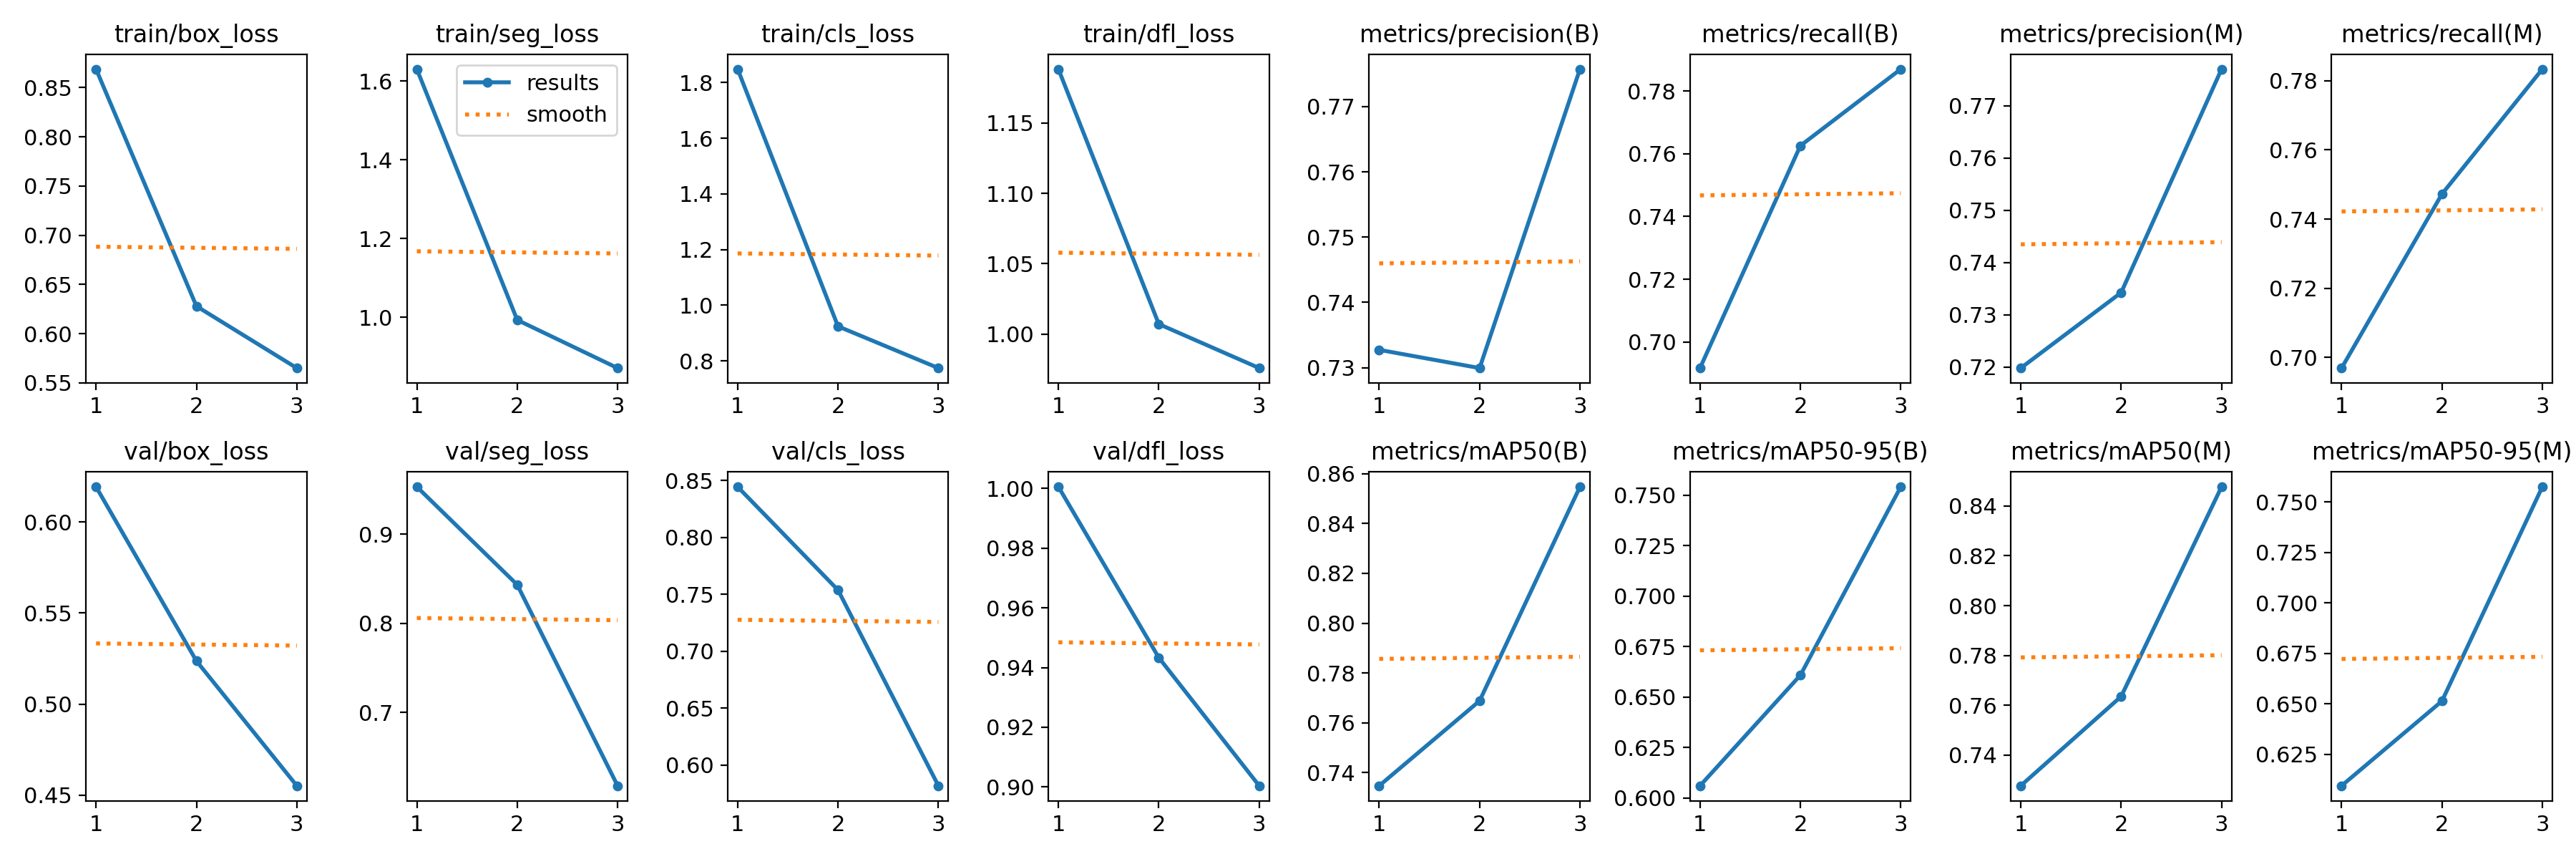

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


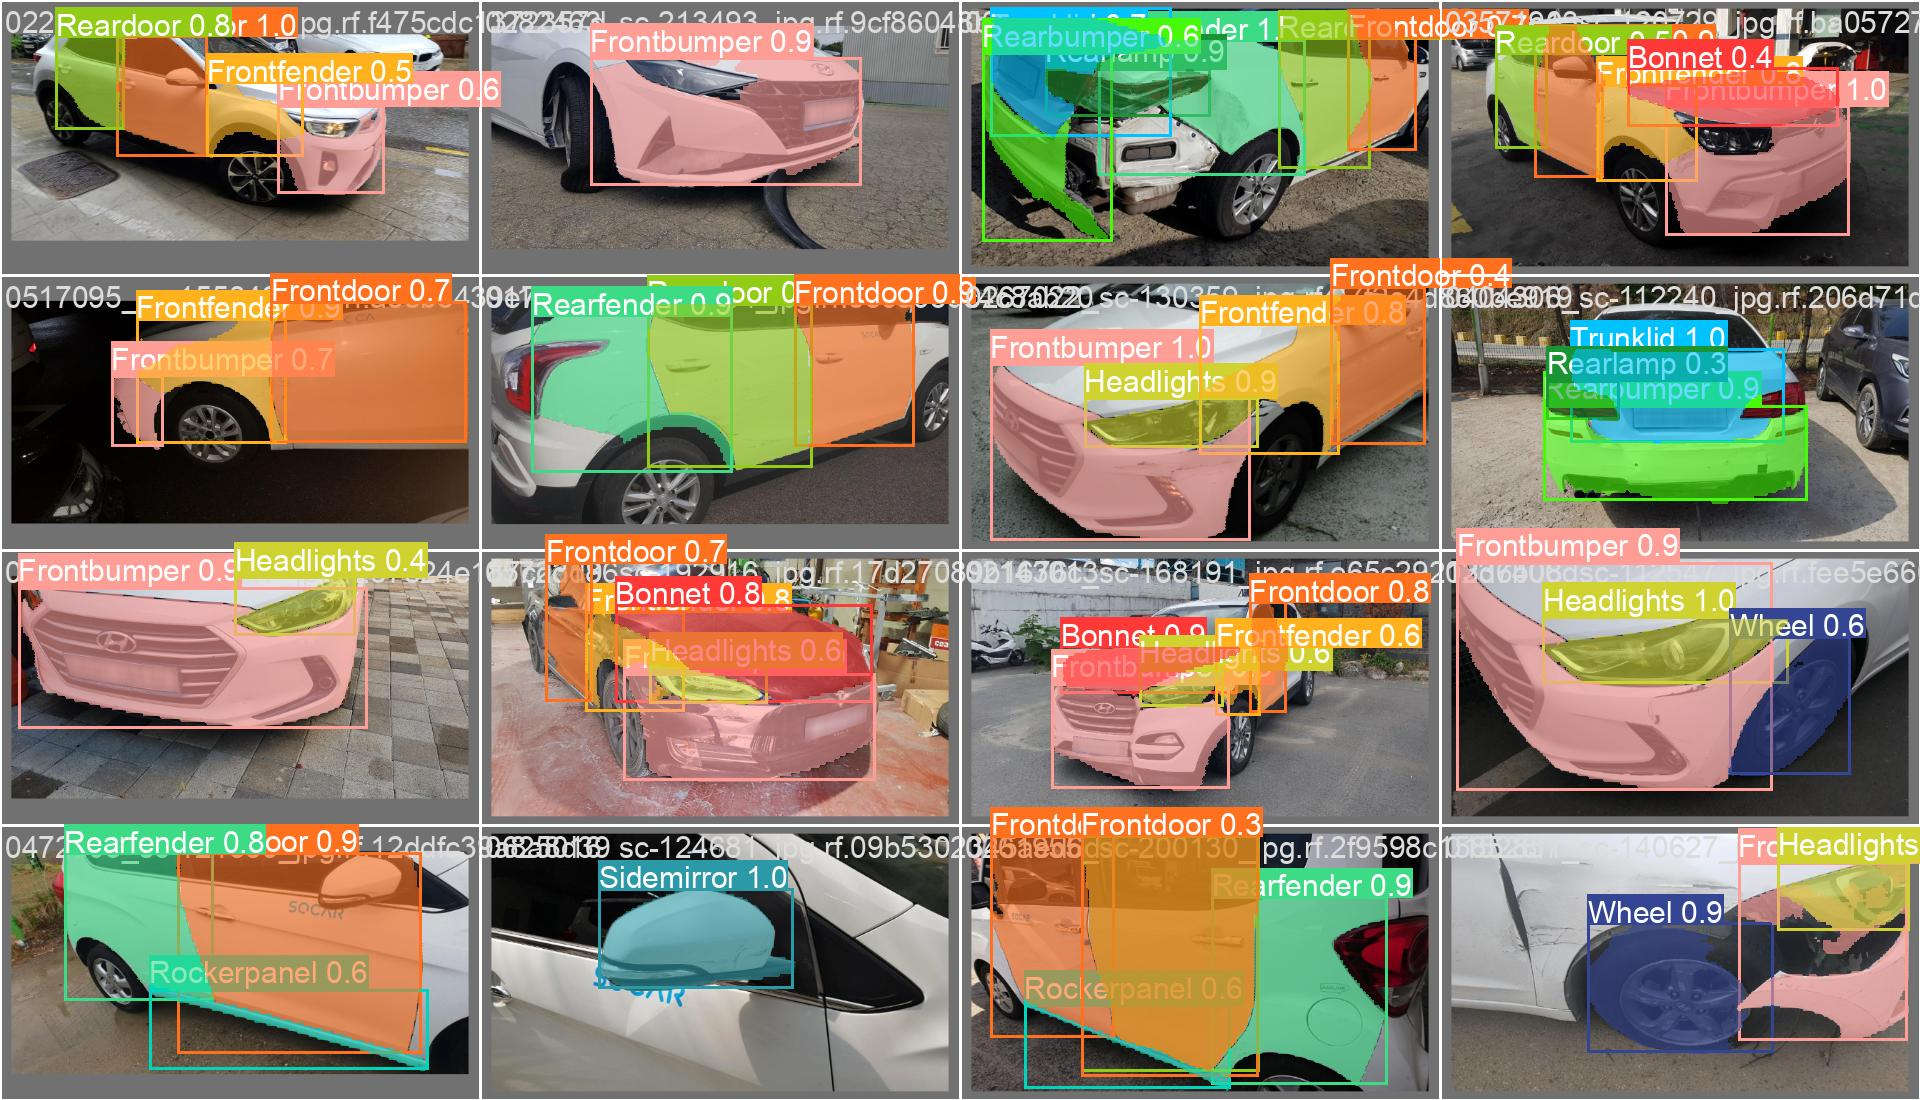

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11785018 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/datasets/part-autolabeld-5/valid/labels.cache... 1887 images, 0 backgrounds, 0 corrupt: 100% 1887/1887 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/datasets/part-autolabeld-5/valid/images/0029502_sc-161833_jpg.rf.f0cc602cbbe567abee8c5e8097684ff0.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/part-autolabeld-5/valid/images/0177909_as-0042156_jpg.rf.a43d7ffcbc344ee0d2a2a0a4b7015c87.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/part-autolabeld-5/valid/images/0237724_as-0068252_jpg.rf.b365be8c22a06734c9fd1a0774eb1d4c.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/part-autolabeld-5/valid/images/0259102_sc-150122_jpg.rf.6df8746593987da8438d6d3ff69d6352.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/datasets/part-autolabeld-5

#### Tiêu chí detect tốt nhất là "Frontbumper", phần detect không tốt nhất là "Rearlamp". Trong khi đó, phần "Windshield" có Recall bằng 0, nghĩa là mô hình không phát hiện được bất kỳ đối tượng nào thuộc class này trong tập dữ liệu.

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true save_crop=true

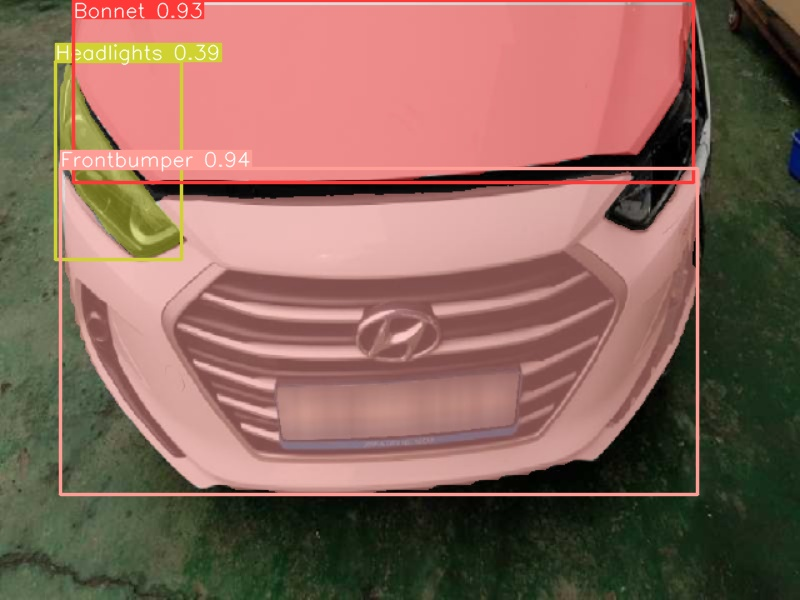

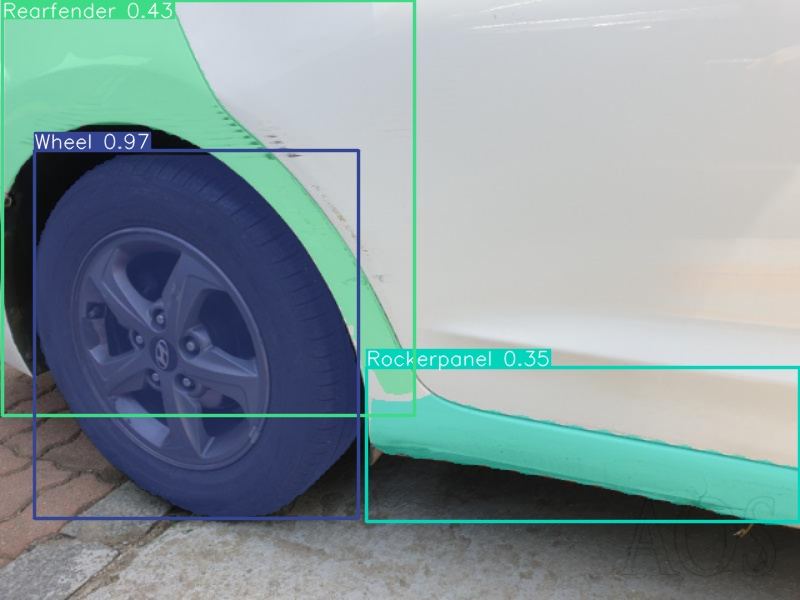

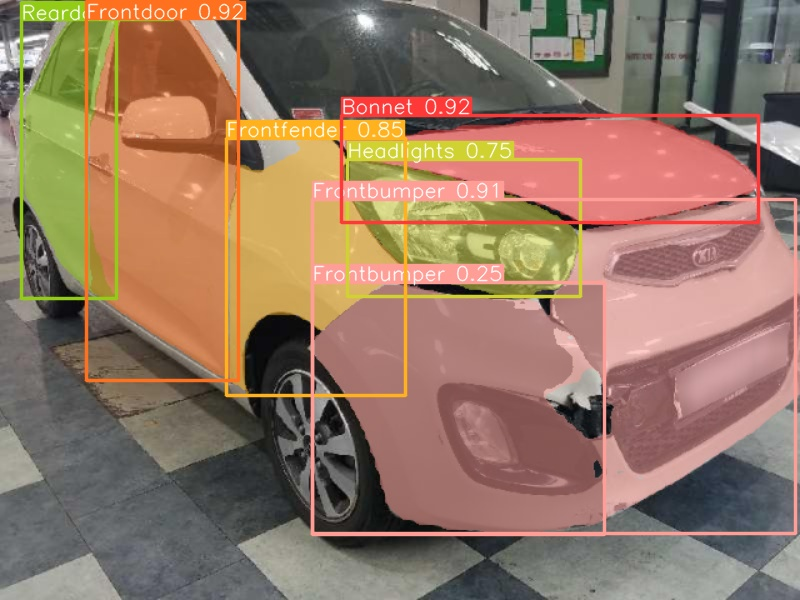

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

## 2.2. Hiển thị phần detect tốt nhất

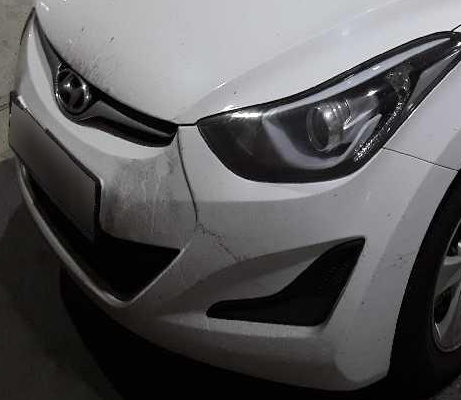

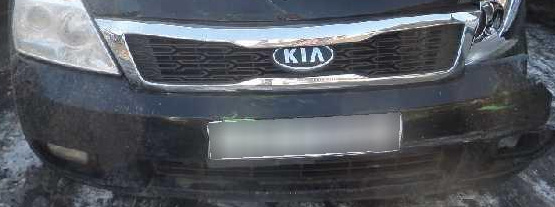

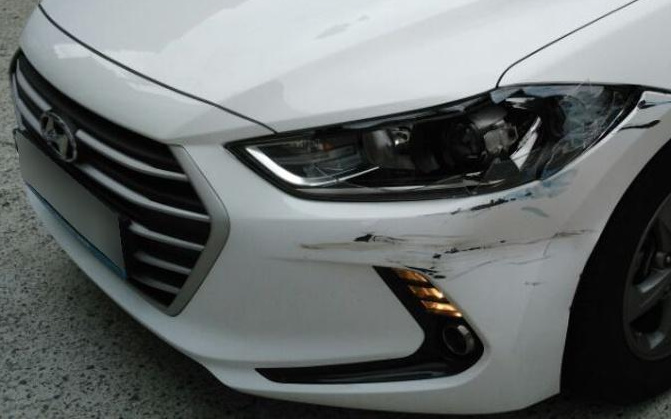

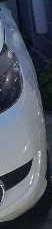

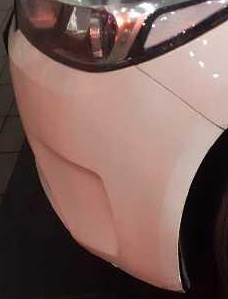

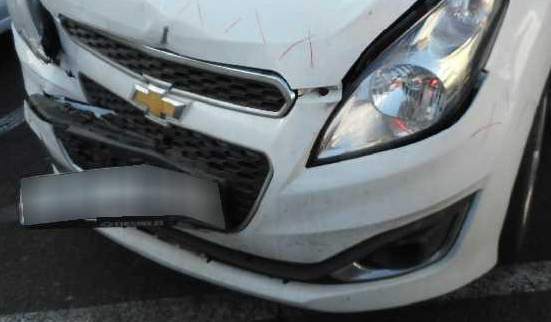

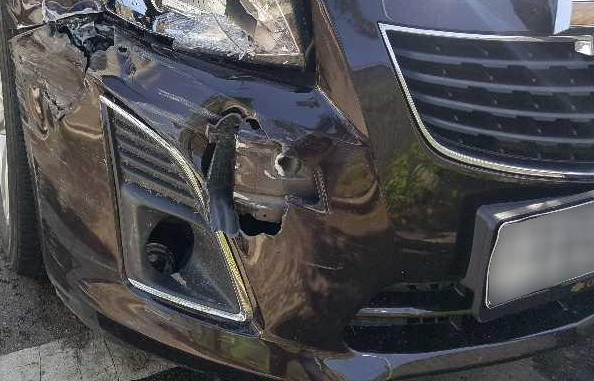

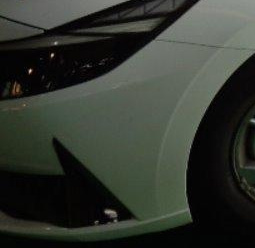

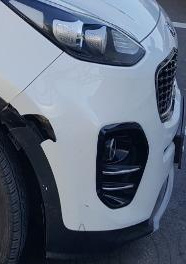

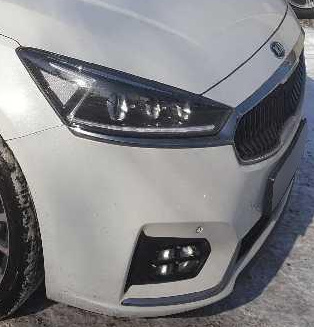

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/segment/predict/crops/Frontbumper/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

## 2.3. Hiển thị phần detect không tốt nhất

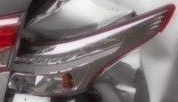

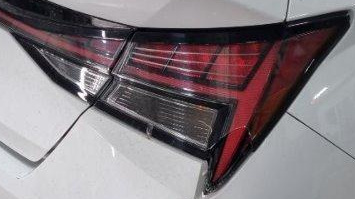

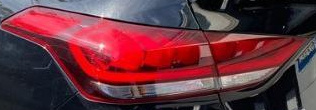

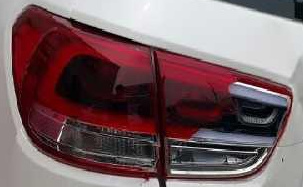

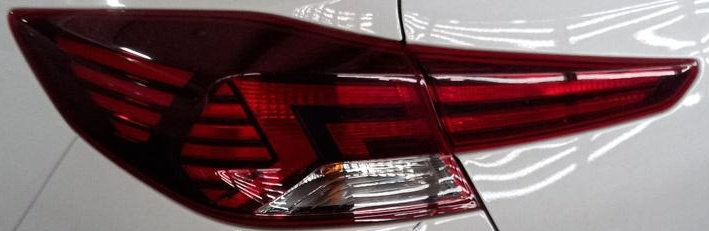

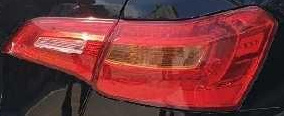

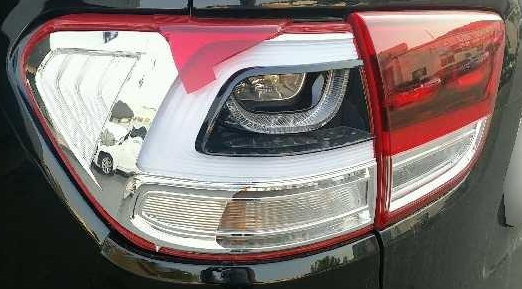

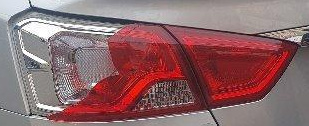

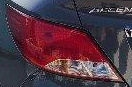

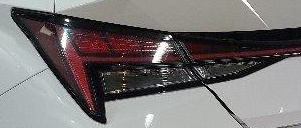

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/segment/predict/crops/Rearlamp/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")